### Setup and Data Import

In [1]:
from plotnine import ggplot, aes, geom_point, geom_smooth, theme_minimal, labs
import pandas as pd
import numpy as np
import patsy as pt
from sklearn.linear_model import LinearRegression


url = "https://raw.githubusercontent.com/roualdes/data/refs/heads/master/penguins.csv"
penguins = pd.read_csv(url)

### 1. Simple Linear Regression


/home/aditya/myenv/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


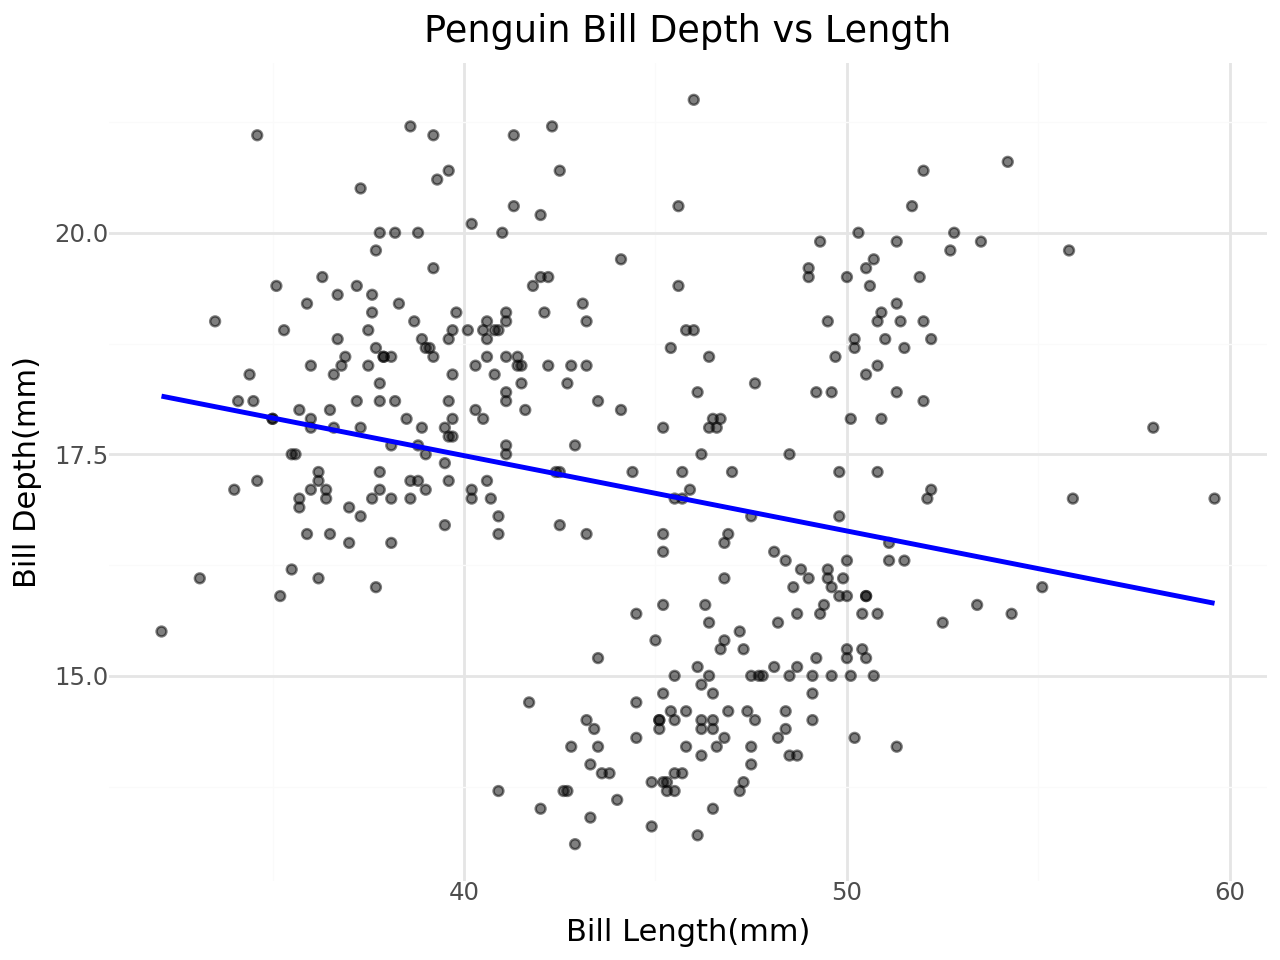

In [14]:
plot = (
    ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm')) +
    geom_point(alpha=0.5) +
    geom_smooth(method='lm', color='blue',se=False) +
    theme_minimal() +
    labs(
        x='Bill Length(mm)',
        y='Bill Depth(mm)',
        title='Penguin Bill Depth vs Length'
    )
)
plot

#### b

In [3]:
# Create design matrices and fit the model
y,X = pt.dmatrices("bill_depth_mm ~ bill_length_mm", penguins)
fit = LinearRegression(fit_intercept = False).fit(X, y)
fit.coef_[0]

array([20.88546832, -0.08502128])

C.   
The Intercept means the depth of the bill for a length of 0, which is biologically impossible because penguins cannot have a bill of 0 mm. Although mathematically necessary when performing model fitting, interpretation of the intercept has, in this case, no useful meaning. Data centering or scaling would make the estimates more interpretable.

D  The slope, however, offers valuable insight into how bill depth affects bill length in penguins. This information can help uncover relationships between these morphological features, but its interpretation should always be framed within the biological context of the species under study.

#### E

In [4]:
# Make prediction for bill_length = 45.7mm
bill_length = 45.7 
prediction = fit.predict(np.array([[1, bill_length]]))[0, 0]
print(prediction)

16.99999578701579


####f

In [5]:
# Calculate residual
value = penguins[penguins['species'] == 'Gentoo']['bill_depth_mm'][penguins['bill_length_mm'] == bill_length].values
residual = value[0] - prediction
print(residual)

-3.099995787015791


### 2. Multiple Linear Regression
#a

/home/aditya/myenv/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


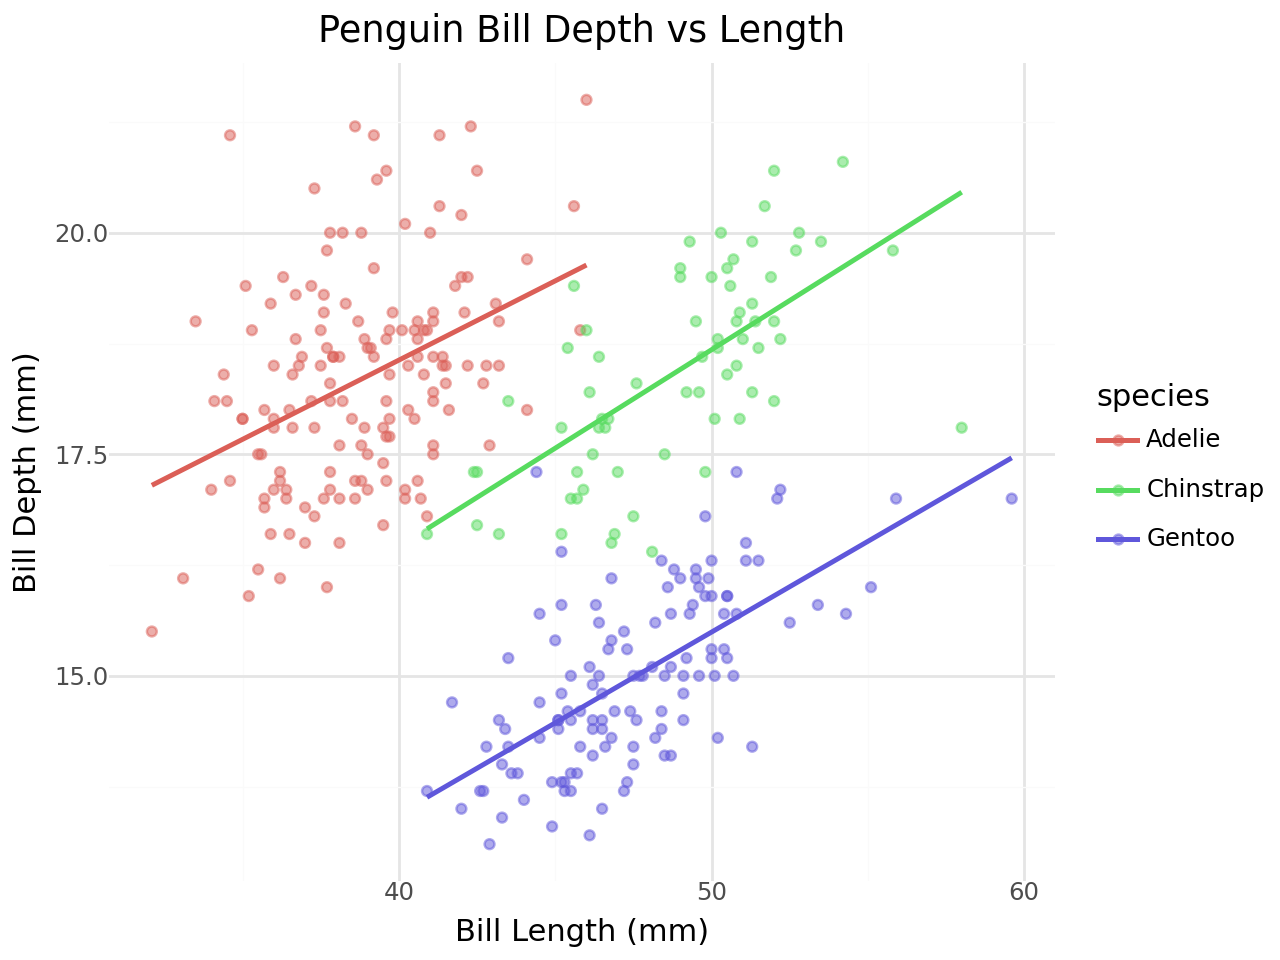

In [15]:
plot_1 = (
    ggplot(penguins, aes(x='bill_length_mm', y='bill_depth_mm', color='species')) +
    geom_point(alpha=0.5) +
    geom_smooth(method='lm',se=False) +
    theme_minimal() +
    labs(
        x='Bill Length (mm)',
        y='Bill Depth (mm)',
        title='Penguin Bill Depth vs Length'
    )
)
plot_1

####b

In [11]:
# Fit multiple linear regression model
y, X = pt.dmatrices("bill_depth_mm ~ species + bill_length_mm", penguins)
fit = LinearRegression(fit_intercept=False).fit(X, y)
b = fit.coef_[0]
b

array([10.59218046, -1.93319426, -5.10602008,  0.19989428])

####c

In [12]:
# Predict for Gentoo penguin
bill_length = 45.7
prediction_1 = b[0]+b[2] + b[3] * bill_length
print(prediction_1)

14.621329021366176


the output of prediction estimates value of bill depth with bill length 45.7 mm